Scott Henkel- 10929976

Welda Igouwe Ayite Zonor- 11285981

Oluwalere Jimi-Shodeko- 11415498

Melissa Rodriguez- 11372074

**Before Running any code please ensure CommunitiesDataset.csv is in the folder as the file will disappear if the runtime is stopped and you make sure the file path is modified to fit the location of the file**

**1.	In what ways do crime rates differ across various communities throughout the data set?**

**•	To respond to the question we will write a code that displays the shape of the dataset using visuals that show the distribution of the crime rates.**


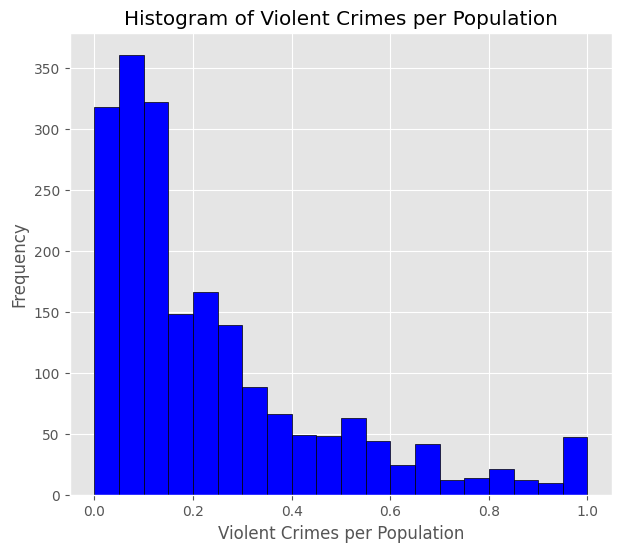


Violent Crimes Per Pop - Descriptive Statistics
-----------------------------------------------
Count:    1994.0000
Mean:        0.2380
Std Dev:     0.2330
Min:         0.0000
25%:         0.0700
50%:         0.1500
75%:         0.3300
Max:         1.0000



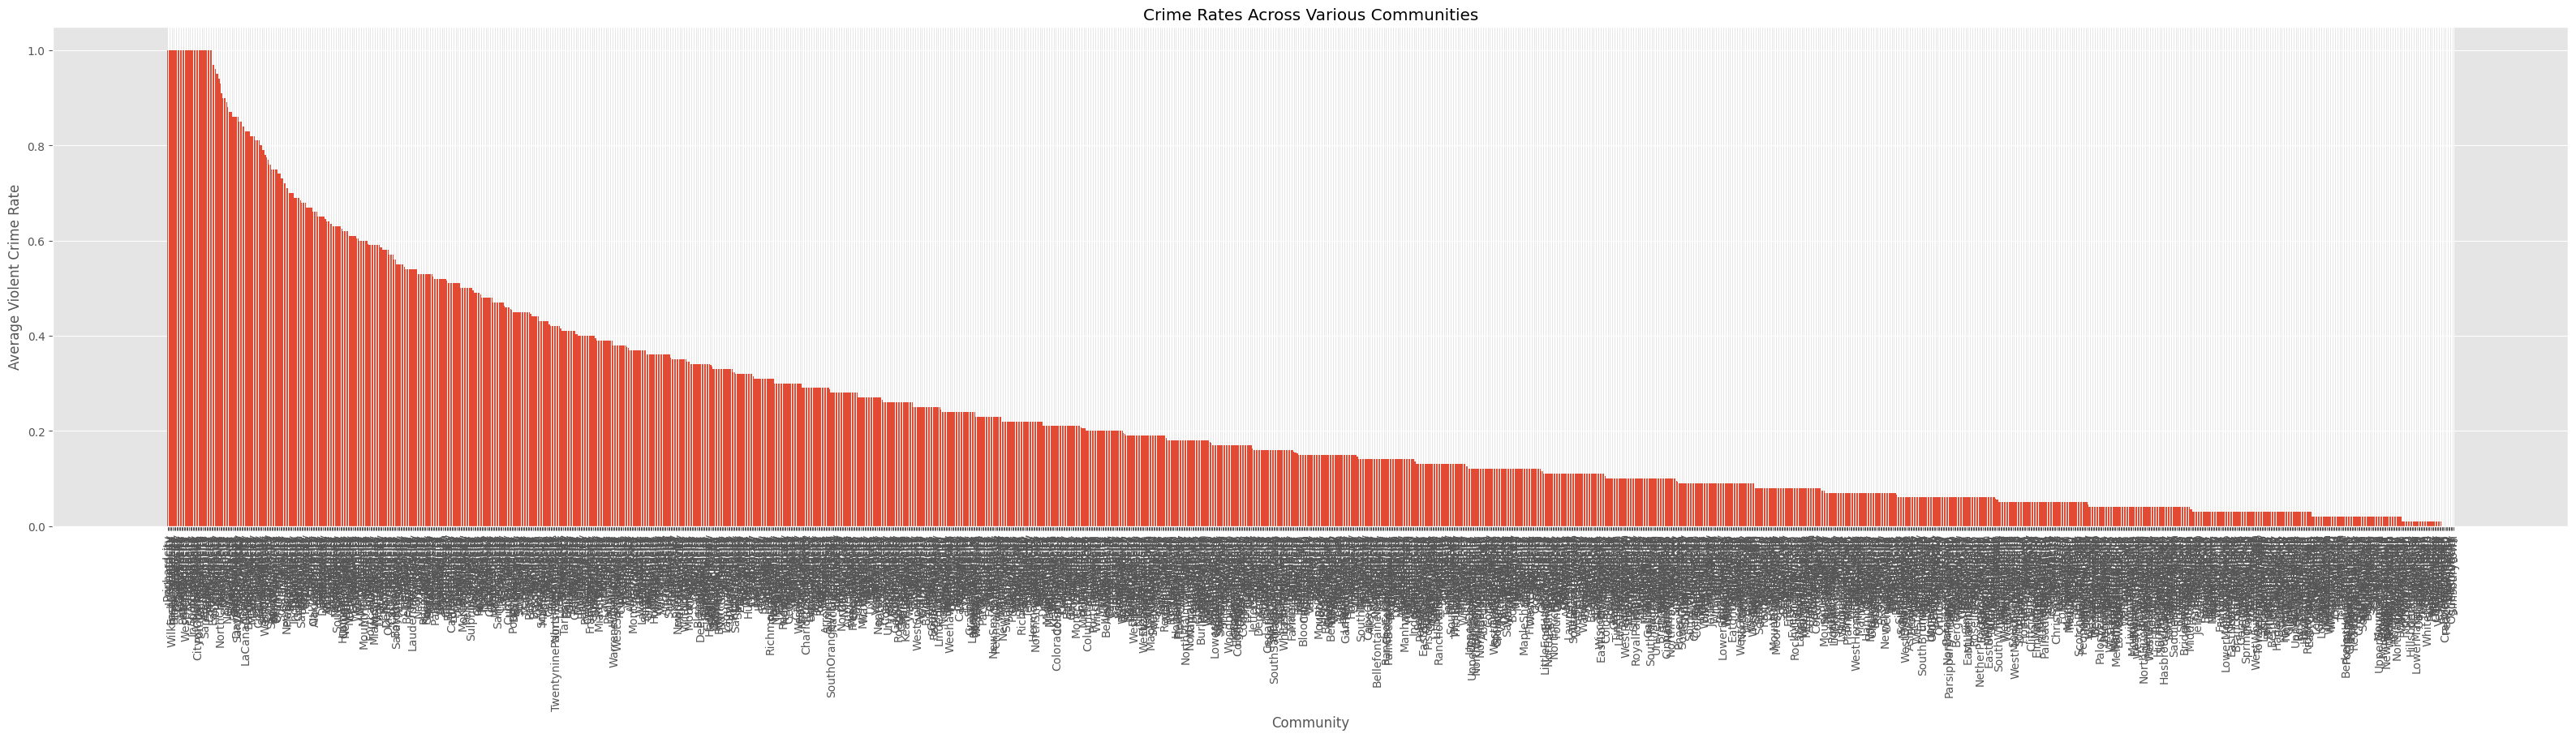

   state  county  ViolentCrimesPerPop
0      6    71.0                0.420
1      6    81.0                0.160
2      8    41.0                0.210
3      9     1.0                0.103
4      9     3.0                0.113


In [ ]:
#Question 1
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
communities_data = pd.read_csv('/content/CommunitiesDataset.csv')

# Set the style for the plots
plt.style.use('ggplot')

# Create a figure for the histogram
fig, ax = plt.subplots(figsize=(7, 6))

# Plotting the histogram of Violent Crimes per Population
ax.hist(communities_data['ViolentCrimesPerPop'], bins=20, color='blue', edgecolor='black')
ax.set_title('Histogram of Violent Crimes per Population')
ax.set_xlabel('Violent Crimes per Population')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

# Calculate the descriptive statistics
stats = communities_data['ViolentCrimesPerPop'].describe()

# Format the output
formatted_stats = f"""
Violent Crimes Per Pop - Descriptive Statistics
-----------------------------------------------
Count:   {stats['count']:>10.4f}
Mean:    {stats['mean']:>10.4f}
Std Dev: {stats['std']:>10.4f}
Min:     {stats['min']:>10.4f}
25%:     {stats['25%']:>10.4f}
50%:     {stats['50%']:>10.4f}
75%:     {stats['75%']:>10.4f}
Max:     {stats['max']:>10.4f}
"""

print(formatted_stats)

# Assuming 'communityname' is a column with the names of the communities
# and 'ViolentCrimesPerPop' is the crime rate
crime_rates = communities_data[['communityname', 'ViolentCrimesPerPop']].groupby('communityname').mean()

# Sort the data for better visualization
crime_rates = crime_rates.sort_values(by='ViolentCrimesPerPop', ascending=False)

# Plotting
plt.figure(figsize=(40, 8))  # Significantly increased width
plt.rcParams.update({'font.size': 10})  # Adjust font size if needed
plt.bar(crime_rates.index, crime_rates['ViolentCrimesPerPop'])  # Using plt.bar to have more control over the plot
plt.title('Crime Rates Across Various Communities')
plt.xlabel('Community')
plt.ylabel('Average Violent Crime Rate')
plt.xticks(rotation=90)  # Ensure rotation for better visibility
plt.show()

# Group data by 'state' and 'county' and calculate mean
county_crime_rates = communities_data.groupby(['state', 'county'])['ViolentCrimesPerPop'].mean().reset_index()
print(county_crime_rates.head())


import plotly.express as px
import geopandas as gpd

# Group data by 'state' and calculate mean violent crime rates per state
# Ensure 'state' is an appropriate identifier that matches the GeoJSON properties
state_crime_rates = communities_data.groupby('state')['ViolentCrimesPerPop'].mean().reset_index()

# Load the GeoJSON for U.S. states
url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
states_geojson = gpd.read_file(url)

# Plotting the choropleth map
fig = px.choropleth(state_crime_rates,
                    geojson=states_geojson,
                    locations='state',  # This should be the state identifier from your data
                    featureidkey="properties.id",  # Adjust this based on your GeoJSON properties
                    color='ViolentCrimesPerPop',
                    color_continuous_scale="Viridis",
                    scope="usa",
                    labels={'ViolentCrimesPerPop': 'Average Violent Crimes Per Population'})
fig.update_geos(fitbounds="locations")
fig.update_layout(title_text="Average Violent Crime Rate per Population by State")
fig.show()


**2.	How does the absence of data affect the analysis of socioeconomic indicators and crime rates?**

**•	In this question we will identify the missing values throughout the data and identify what is the best way to retain the data's statistical properties.**


In [ ]:
#Question 2

import pandas as pd

# Load the dataset
file_path = '/content/CommunitiesDataset.csv'
data = pd.read_csv(file_path)

# Counting missing values for each column
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]  # filter columns with missing values

# For display purposes, let's format this output
missing_values_str = missing_values.to_string()

# Imputation for 'OtherPerCap' using the median value
median_value = 0.25
data['OtherPerCap'].fillna(median_value, inplace=True)
missing_after_imputation = data['OtherPerCap'].isnull().sum()

print(missing_values_str)
print(f"Missing values after imputation in 'OtherPerCap': {missing_after_imputation}")

county                  1174
community               1177
OtherPerCap                1
LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTFieldOps       1675
LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
LemasTotReqPerPop       1675
PolicReqPerOffic        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
PolicAveOTWorked        1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
PolicBudgPerPop         1675
Missing values after imputation in 'OtherPerCap': 0


**3.	What are the disparities in crime rates between communities characterized by high poverty levels compared to those characterized by low poverty levels?**

**•	To respond to this question we will implement a conditional statement to filter communities based on low and high poverty levels.**


Median Poverty Threshold: 25.00%
Average Violent Crime Rate in High Poverty Areas: 36.04%
Average Violent Crime Rate in Low Poverty Areas: 12.25%


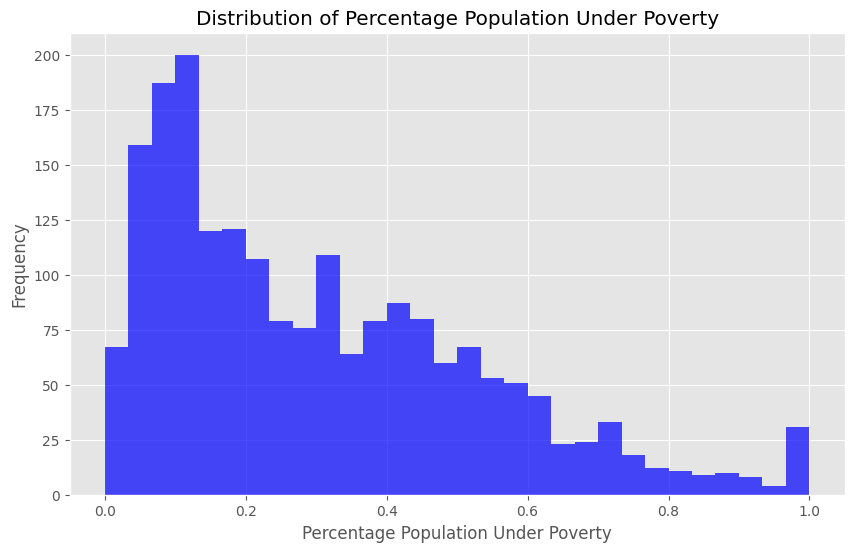

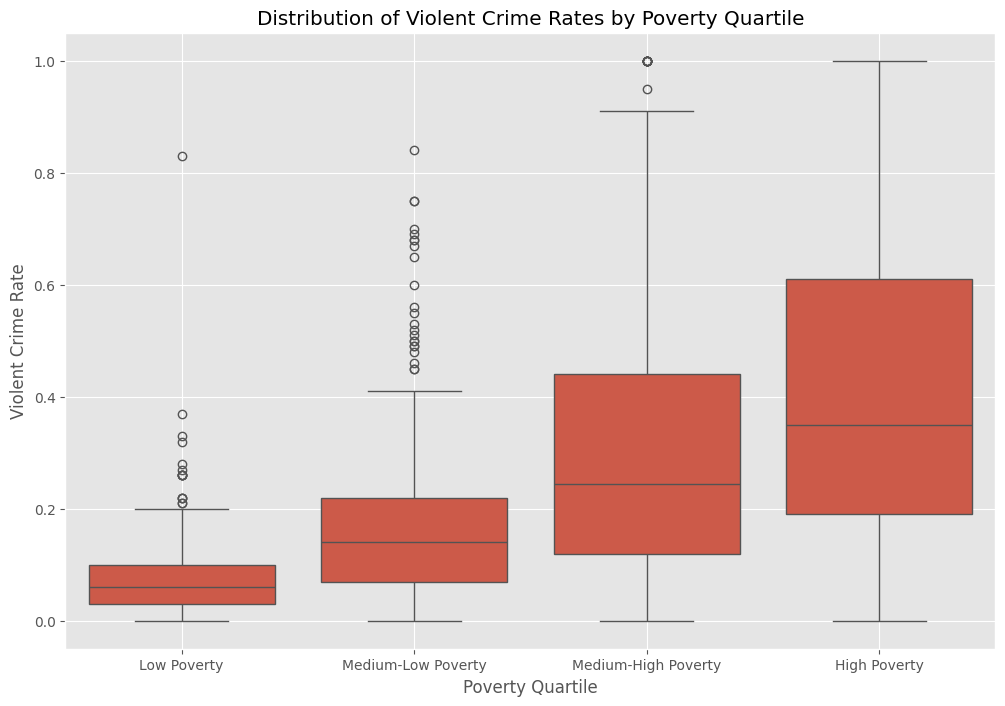

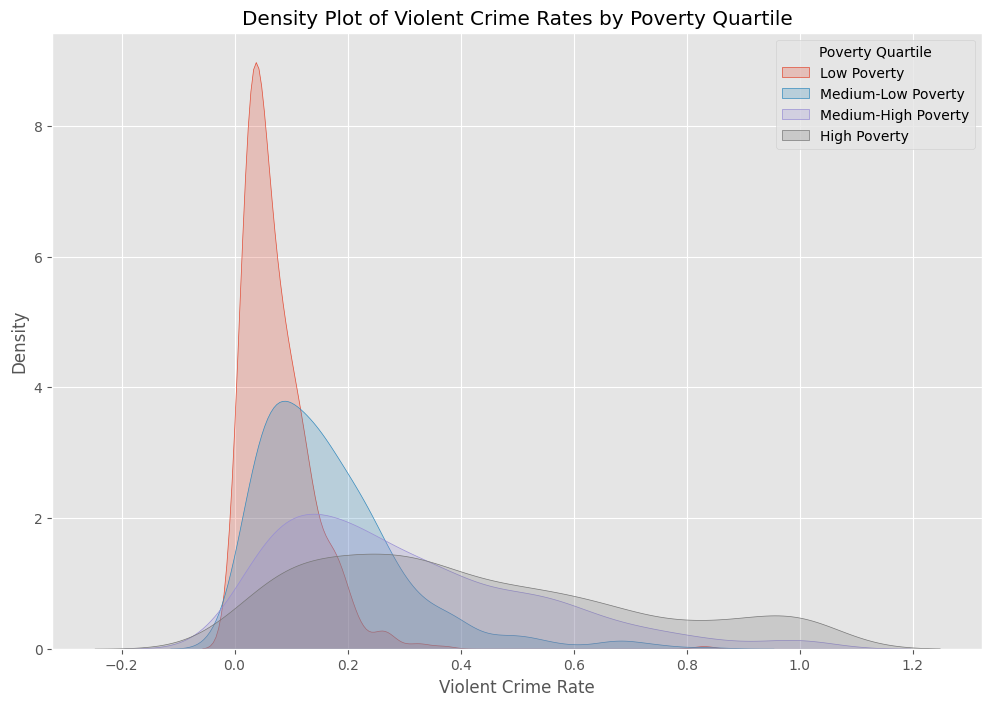

                      mean    std  count
Poverty_Quartile                        
Low Poverty          0.076  0.067    517
Medium-Low Poverty   0.170  0.132    509
Medium-High Poverty  0.304  0.226    488
High Poverty         0.418  0.284    480
ANOVA Test Results: F-statistic = 298.42, p-value = 0.0000
There is a statistically significant difference between the groups.


In [ ]:
#Question 3

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/CommunitiesDataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Calculate the median value of the 'PctPopUnderPov' column
median_poverty_threshold = data['PctPopUnderPov'].median()

# Create two subsets of data based on the median poverty threshold
high_poverty_data = data[data['PctPopUnderPov'] > median_poverty_threshold]
low_poverty_data = data[data['PctPopUnderPov'] <= median_poverty_threshold]

# Calculate average violent crime rates per population for both high and low poverty areas
average_crime_rate_high_poverty = high_poverty_data['ViolentCrimesPerPop'].mean()
average_crime_rate_low_poverty = low_poverty_data['ViolentCrimesPerPop'].mean()

# Print the median poverty threshold and the average crime rates
print(f"Median Poverty Threshold: {median_poverty_threshold*100:.2f}%")
print(f"Average Violent Crime Rate in High Poverty Areas: {average_crime_rate_high_poverty*100:.2f}%")
print(f"Average Violent Crime Rate in Low Poverty Areas: {average_crime_rate_low_poverty*100:.2f}%")

# Optional: Plotting to visualize the distribution of 'PctPopUnderPov'
plt.figure(figsize=(10, 6))
plt.hist(data['PctPopUnderPov'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Percentage Population Under Poverty')
plt.xlabel('Percentage Population Under Poverty')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

import seaborn as sns
import scipy.stats as stats
# Calculate quartiles for the 'PctPopUnderPov' column
quartiles = data['PctPopUnderPov'].quantile([0.25, 0.5, 0.75])

# Create subsets of data based on poverty quartiles
data['Poverty_Quartile'] = pd.cut(data['PctPopUnderPov'],
                                  bins=[0, quartiles[0.25], quartiles[0.5], quartiles[0.75], 1],
                                  include_lowest=True,
                                  labels=['Low Poverty', 'Medium-Low Poverty', 'Medium-High Poverty', 'High Poverty'])

# Calculate average violent crime rates per population for each quartile
grouped_data = data.groupby('Poverty_Quartile')['ViolentCrimesPerPop'].agg(['mean', 'std', 'count'])

# Plotting the distribution of crime rates for each quartile
plt.figure(figsize=(12, 8))
sns.boxplot(x='Poverty_Quartile', y='ViolentCrimesPerPop', data=data)
plt.title('Distribution of Violent Crime Rates by Poverty Quartile')
plt.ylabel('Violent Crime Rate')
plt.xlabel('Poverty Quartile')
plt.grid(True)
plt.show()


# Plotting the distribution of crime rates for each quartile using density plot
plt.figure(figsize=(12, 8))
for quartile in ['Low Poverty', 'Medium-Low Poverty', 'Medium-High Poverty', 'High Poverty']:
    subset = data[data['Poverty_Quartile'] == quartile]
    sns.kdeplot(subset['ViolentCrimesPerPop'], label=quartile, fill=True, common_norm=False)
plt.title('Density Plot of Violent Crime Rates by Poverty Quartile')
plt.ylabel('Density')
plt.xlabel('Violent Crime Rate')
plt.legend(title='Poverty Quartile')
plt.grid(True)
plt.show()


# Print the calculated means, std, and count
print(grouped_data)

# Statistical Difference: ANOVA Test
anova_results = stats.f_oneway(data[data['Poverty_Quartile'] == 'Low Poverty']['ViolentCrimesPerPop'],
                               data[data['Poverty_Quartile'] == 'Medium-Low Poverty']['ViolentCrimesPerPop'],
                               data[data['Poverty_Quartile'] == 'Medium-High Poverty']['ViolentCrimesPerPop'],
                               data[data['Poverty_Quartile'] == 'High Poverty']['ViolentCrimesPerPop'])

print(f"ANOVA Test Results: F-statistic = {anova_results.statistic:.2f}, p-value = {anova_results.pvalue:.4f}")
if anova_results.pvalue < 0.05:
    print("There is a statistically significant difference between the groups.")
else:
    print("There is no statistically significant difference between the groups.")


**4.	What are the typical characteristics exhibited by the top 5 communities with the highest crime rates?**

**•	To respond to this question we will be using a loop to iterate over the sortes crime data and then using a break statement after the 5 communities to summarize their features.**


In [ ]:
#Question 4

import pandas as pd

# Load the dataset
file_path = '/content/CommunitiesDataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Define a function to format percentages to two decimal places if the value is not 'N/A'
def format_percentage(value):
    if pd.isna(value) or value == 'N/A':
        return 'N/A'
    else:
        return f"{value * 100:.2f}%"

# Sort the data by 'ViolentCrimesPerPop' in descending order to find the communities with the highest crime rates
sorted_data = data.sort_values(by='ViolentCrimesPerPop', ascending=False)

# Extract the top 5 communities from the sorted list
top_5_communities = sorted_data.head(5)

# Initialize a list to collect summaries of each community's key characteristics
community_summaries = []

# Loop through the top 5 communities and collect their characteristics
for index, row in top_5_communities.iterrows():
    summary = {
        'Community': row['communityname'],
        'Population': row['population'],
        'Median Income': row.get('medIncome', 'N/A'),  # Using .get() to handle potentially missing columns safely
        'Percentage Under Poverty': format_percentage(row.get('PctPopUnderPov', 'N/A')),
        'Violent Crimes per Population': row['ViolentCrimesPerPop']
    }
    community_summaries.append(summary)

# Print the collected information for each of the top 5 communities in aligned format
for community in community_summaries:
    print(f"Community: {community['Community']}")
    print(f"Population: {community['Population']}")
    print(f"Median Income: {community['Median Income']}")
    print(f"Percentage Under Poverty: {community['Percentage Under Poverty']}")
    print(f"Violent Crimes per Population: {community['Violent Crimes per Population']}\n")

Community: Opelikacity
Population: 0.02
Median Income: 0.23
Percentage Under Poverty: 55.00%
Violent Crimes per Population: 1.0

Community: Prichardcity
Population: 0.04
Median Income: 0.0
Percentage Under Poverty: 100.00%
Violent Crimes per Population: 1.0

Community: Tampacity
Population: 0.43
Median Income: 0.18
Percentage Under Poverty: 51.00%
Violent Crimes per Population: 1.0

Community: Selmacity
Population: 0.02
Median Income: 0.07
Percentage Under Poverty: 96.00%
Violent Crimes per Population: 1.0

Community: Birminghamcity
Population: 0.41
Median Income: 0.13
Percentage Under Poverty: 66.00%
Violent Crimes per Population: 1.0



5.	**How does the average police per capita fluctuate across communities characterized by different levels of urbanization?**

**•	To respond to the question we will be writing a loop that will group all the communities by urbanization levels and that calculates the average police per capita, this will continue to skip and groups for incomplete data.**


UrbanizationLevel        PolicCars
-----------------        ---------
High Urbanization       0.1874
Low Urbanization        0.2206
Moderate Urbanization   0.1482
Very High Urbanization  0.1454


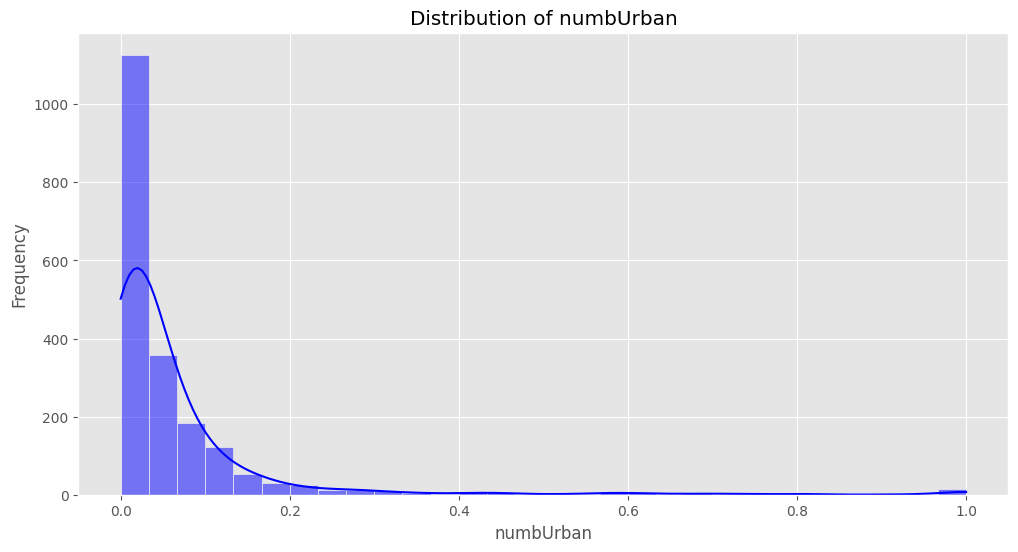

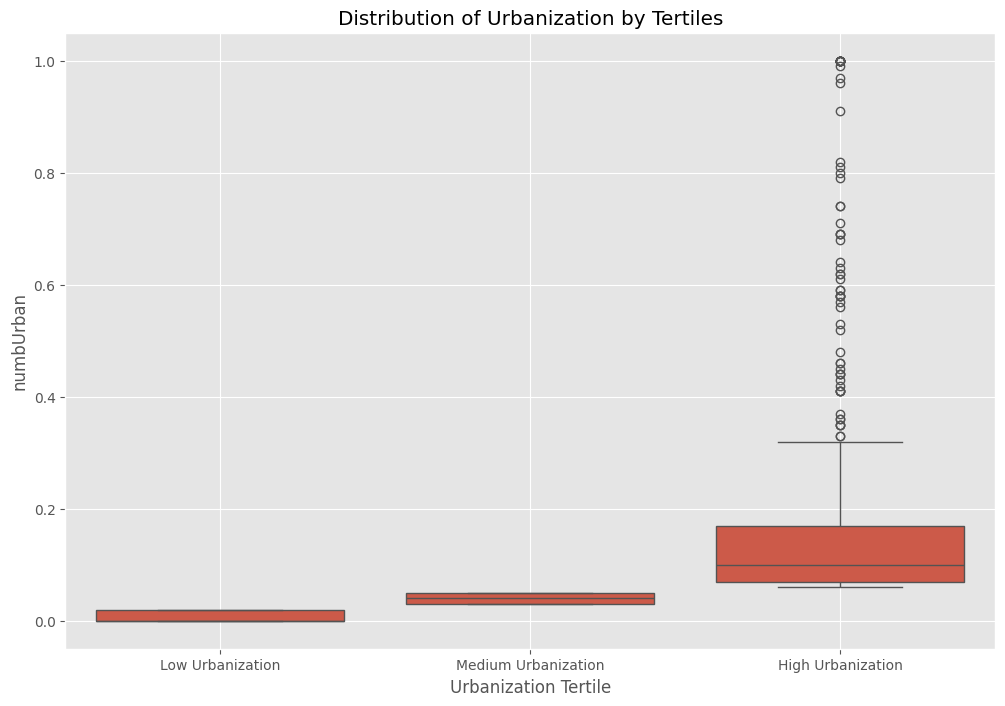

   state  county  community        communityname  fold  population  \
0      8     NaN        NaN         Lakewoodcity     1        0.19   
1     53     NaN        NaN          Tukwilacity     1        0.00   
2     24     NaN        NaN         Aberdeentown     1        0.00   
3     34     5.0    81440.0  Willingborotownship     1        0.04   
4     42    95.0     6096.0    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  PopDens  \
0           0.33          0.02          0.90          0.12  ...     0.26   
1           0.16          0.12          0.74          0.45  ...     0.12   
2           0.42          0.49          0.56          0.17  ...     0.21   
3           0.77          1.00          0.08          0.12  ...     0.39   
4           0.55          0.02          0.95          0.09  ...     0.09   

   PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0            0.20       0.06           0.04           

<Figure size 1200x800 with 0 Axes>

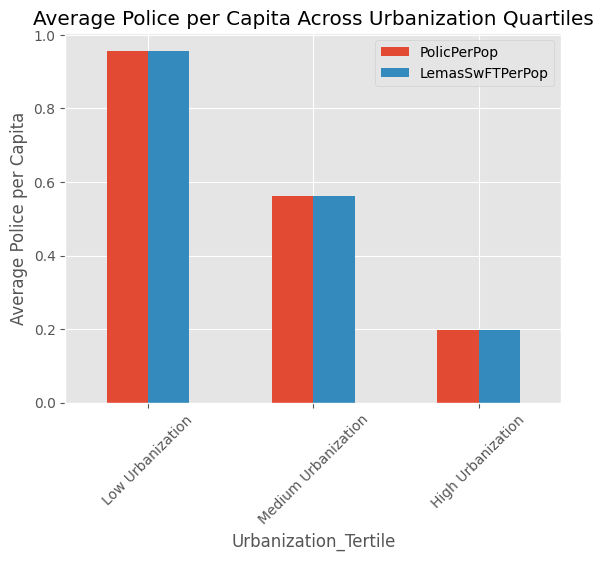

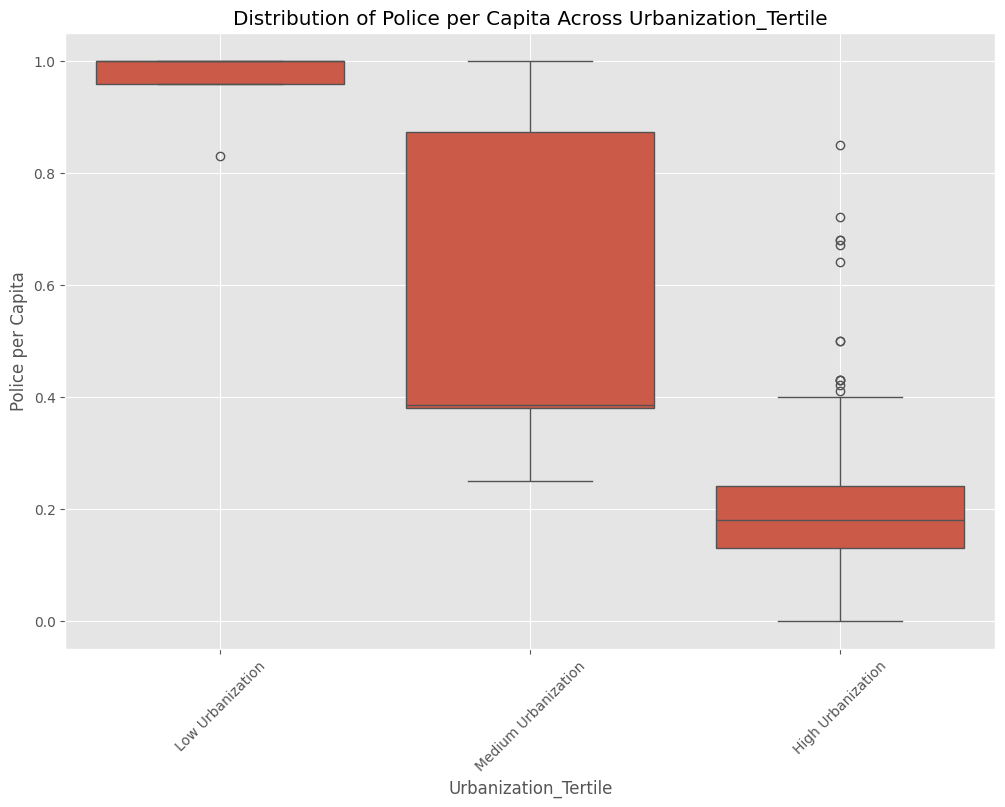

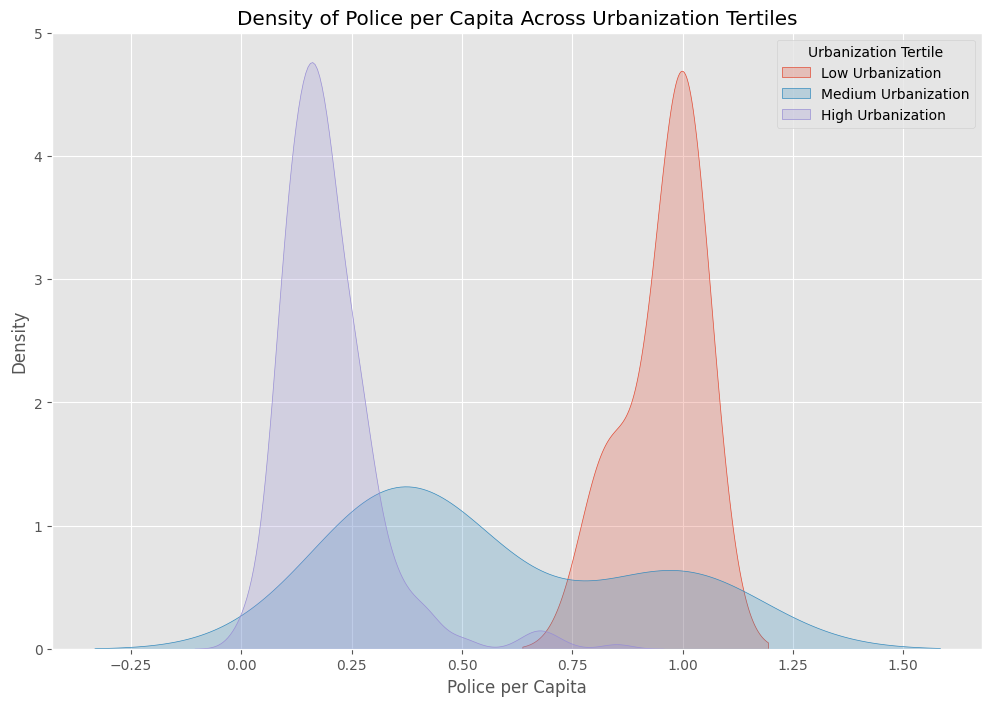

In [ ]:
#Question 5
import pandas as pd

# Load the dataset
file_path = '/content/CommunitiesDataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Drop NaN values and copy the DataFrame to ensure it's treated as a new object
data_clean = data.dropna(subset=['PolicCars']).copy()

# Define urbanization levels based on 'PopDens' quartiles
def classify_urbanization(pop_density):
    if pop_density <= 0.10:
        return 'Low Urbanization'
    elif pop_density <= 0.17:
        return 'Moderate Urbanization'
    elif pop_density <= 0.28:
        return 'High Urbanization'
    else:
        return 'Very High Urbanization'

# Apply the classification
data_clean.loc[:, 'UrbanizationLevel'] = data_clean['PopDens'].apply(classify_urbanization)

# Group by the urbanization level and calculate the average 'PolicCars'
urbanization_polic_cars_average = data_clean.groupby('UrbanizationLevel')['PolicCars'].mean()

# Convert to DataFrame for nicer display
urbanization_polic_cars_df = urbanization_polic_cars_average.reset_index()

# Print the average police per capita for each urbanization level with formatting
print("UrbanizationLevel        PolicCars")
print("-----------------        ---------")
for index, row in urbanization_polic_cars_df.iterrows():
    print(f"{row['UrbanizationLevel']:23s} {row['PolicCars']:>6.4f}")



file_path = '/content/CommunitiesDataset.csv'  # Replace with your file path
# Drop rows where 'numbUrban' is NaN
data = data.dropna(subset=['numbUrban'])


# Plotting the histogram and KDE of 'numbUrban'
plt.figure(figsize=(12, 6))
sns.histplot(data['numbUrban'], bins=30, kde=True, color='blue')
plt.title('Distribution of numbUrban')
plt.xlabel('numbUrban')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Calculate quartiles for 'numbUrban'
# Calculate tertiles for 'numbUrban'
tertiles = data['numbUrban'].quantile([1/3, 2/3])

# Define tertile groups based on 'numbUrban'
data['Urbanization_Tertile'] = pd.cut(data['numbUrban'],
                                      bins=[0, tertiles[1/3], tertiles[2/3], data['numbUrban'].max()],
                                      include_lowest=True,
                                      labels=['Low Urbanization', 'Medium Urbanization', 'High Urbanization'])



# Plotting the distribution of 'numbUrban' within each tertile
plt.figure(figsize=(12, 8))
sns.boxplot(x='Urbanization_Tertile', y='numbUrban', data=data)
plt.title('Distribution of Urbanization by Tertiles')
plt.xlabel('Urbanization Tertile')
plt.ylabel('numbUrban')
plt.grid(True)
plt.show()

# Verify the creation of the new column
print(data.head())
# Calculate average police per capita for each urbanization quartile
average_police_per_quartile = data.groupby('Urbanization_Tertile')[['PolicPerPop', 'LemasSwFTPerPop']].mean()

# Visualize the fluctuation using bar plot
plt.figure(figsize=(12, 8))
average_police_per_quartile.plot(kind='bar', stacked=False)
plt.title('Average Police per Capita Across Urbanization Quartiles')
plt.xlabel('Urbanization_Tertile')
plt.ylabel('Average Police per Capita')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(['PolicPerPop', 'LemasSwFTPerPop'])
plt.show()

# Optional: Visualize using box plot for comparison
plt.figure(figsize=(12, 8))
sns.boxplot(x='Urbanization_Tertile', y='PolicPerPop', data=data)
plt.title('Distribution of Police per Capita Across Urbanization_Tertile')
plt.xlabel('Urbanization_Tertile')
plt.ylabel('Police per Capita')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



# Plotting the KDE for 'PolicPerPop' across Urbanization Tertiles
plt.figure(figsize=(12, 8))
for label in ['Low Urbanization', 'Medium Urbanization', 'High Urbanization']:
    subset = data[data['Urbanization_Tertile'] == label]
    sns.kdeplot(subset['PolicPerPop'], label=label, fill=True)

plt.title('Density of Police per Capita Across Urbanization Tertiles')
plt.xlabel('Police per Capita')
plt.ylabel('Density')
plt.legend(title='Urbanization Tertile')
plt.grid(True)
plt.show()


**6.	Can we forecast crime rates based on community attributes using a basic mathematical model?**

**•	For this question we will define a function that will take community attributes as the input and will return all the estimated crime rates based on those attributes.**


In [ ]:
#Question 6
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/content/CommunitiesDataset.csv')

# Selecting a few potential predictors and the target variable
predictors = ['population', 'PopDens', 'PolicBudgPerPop', 'householdsize', 'racePctWhite', 'racepctblack']
target = 'ViolentCrimesPerPop'

# Filtering the dataset to include only selected predictors and target
model_data = data[predictors + [target]].dropna()

# Preparing the data for the model
X = model_data[predictors].values  # Feature matrix
y = model_data[target].values      # Target vector

# Adding a column of ones to X to account for the intercept
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Calculate the beta coefficients using the normal equation
# beta = (X'X)^-1 X'y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Define a function to predict crime rates based on input attributes
def predict_crime_rate(attributes):
    """
    Predict the crime rate given community attributes using a manual linear regression model.

    Args:
    attributes (list): A list of values for the attributes ['population', 'PopDens', 'PolicBudgPerPop', 'householdsize', 'racePctWhite', 'racepctblack']

    Returns:
    float: Predicted crime rate expressed as a percentage.
    """
    # Include 1 for the intercept
    attributes = [1] + attributes
    attributes = np.array(attributes)
    return np.dot(attributes, beta) * 100  # Multiply by 100 to convert to percentage

# Example usage of the function
example_attributes = [0.01, 0.12, 0.03, 0.33, 0.56, 0.14]  # Example attributes
predicted_crime_rate = predict_crime_rate(example_attributes)
print("Predicted Crime Rate: {:.2f}%".format(predicted_crime_rate))


Predicted Crime Rate: 36.00%


**7.	What is the correlation between community education levels and crime rates?**

**•	For this question we will be defining a function that will be calculating and plotting the correlation between several education metrics and crime rates.**


Correlation between PctNotHSGrad and ViolentCrimesPerPop: 0.4834
Correlation between PctBSorMore and ViolentCrimesPerPop: -0.3147
Correlation between PctUnemployed and ViolentCrimesPerPop: 0.5042
Correlation between PctEmploy and ViolentCrimesPerPop: -0.3316


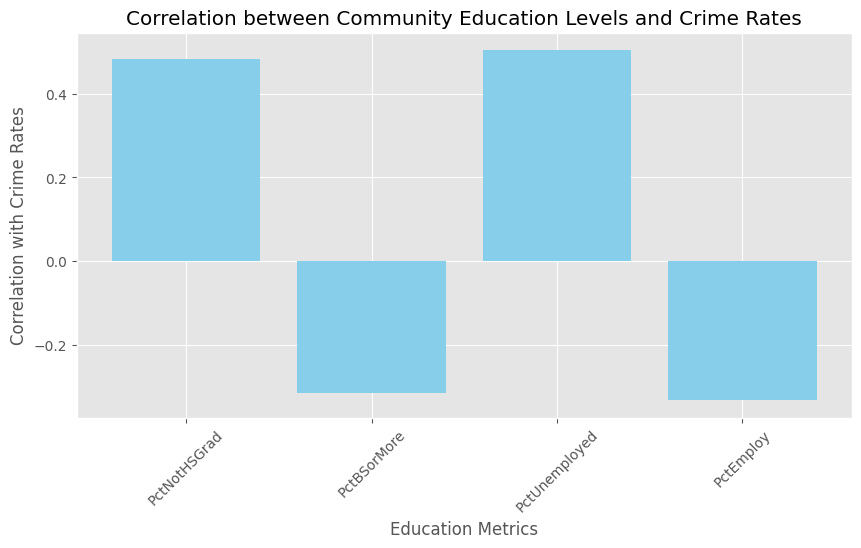

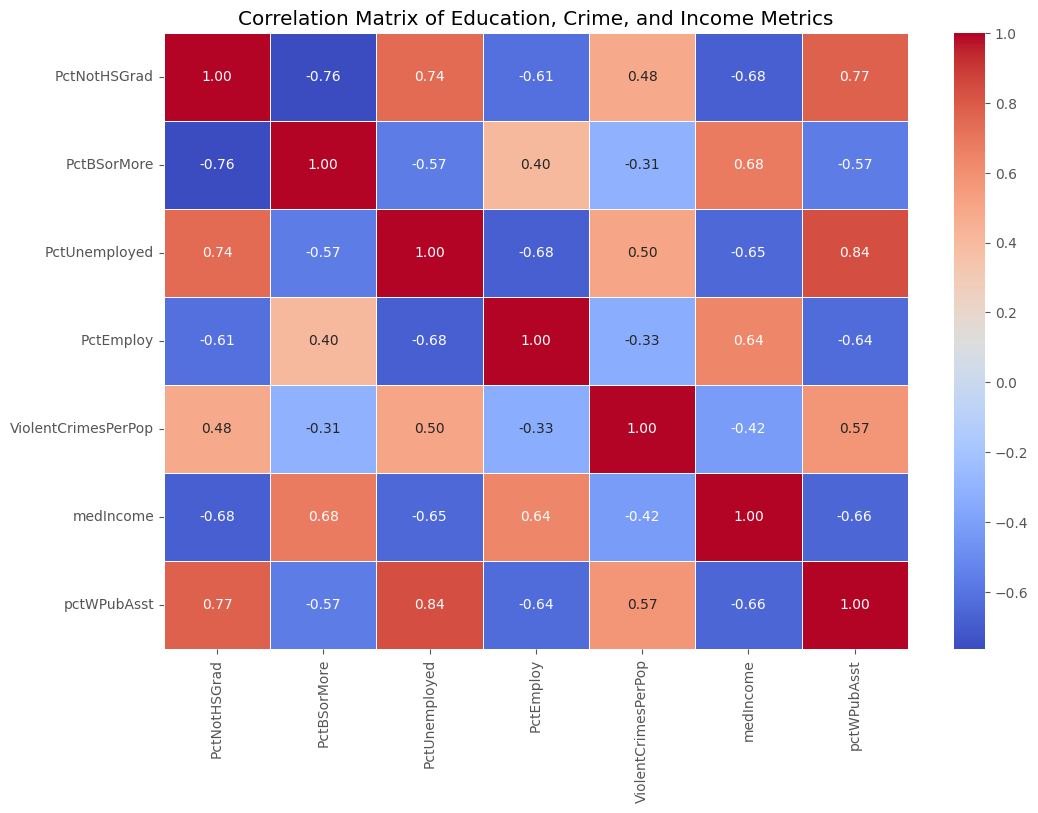

In [ ]:
#Question 7
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def plot_education_crime_correlation():
    # Load the data
    data = pd.read_csv('/content/CommunitiesDataset.csv')


    # List of education-related metrics we're interested in
    education_columns = [
        'PctNotHSGrad',   # Percentage of residents not a high school graduate
        'PctBSorMore',    # Percentage of residents with a bachelor's degree or more
        'PctUnemployed',  # Percentage of the unemployed population
        'PctEmploy',      # Percentage of employed population
    ]

    # Check if the crime rate column exists
    if 'ViolentCrimesPerPop' not in data.columns:
        print("Crime rate column not found in the dataset.")
        return

    # Ensure the columns exist
    for col in education_columns:
        if col not in data.columns:
            print(f"{col} not found in the dataset.")
            return

    # Calculate the correlation and plot
    correlations = []
    for col in education_columns:
        correlation = np.corrcoef(data[col], data['ViolentCrimesPerPop'])[0, 1]
        correlations.append(correlation)
        print(f"Correlation between {col} and ViolentCrimesPerPop: {correlation:.4f}")

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.bar(education_columns, correlations, color='skyblue')
    plt.xlabel('Education Metrics')
    plt.ylabel('Correlation with Crime Rates')
    plt.title('Correlation between Community Education Levels and Crime Rates')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


plot_education_crime_correlation()



def plot_education_crime_income_correlation():
    # Load the data
    data = pd.read_csv('/content/CommunitiesDataset.csv')

    # List of education and additional related metrics we're interested in
    columns_of_interest = [
        'PctNotHSGrad',   # Percentage of residents not a high school graduate
        'PctBSorMore',    # Percentage of residents with a bachelor's degree or more
        'PctUnemployed',  # Percentage of the unemployed population
        'PctEmploy',      # Percentage of employed population
        'ViolentCrimesPerPop',  # Violent crime rate per population
        'medIncome',      # Median income of the population
        'pctWPubAsst'     # Percentage of population with public assistance
    ]

    # Check if the necessary columns exist in the dataset
    missing_columns = [col for col in columns_of_interest if col not in data.columns]
    if missing_columns:
        print(f"Missing columns in the dataset: {', '.join(missing_columns)}")
        return

    # Ensure no NaN values in relevant columns
    data = data.dropna(subset=columns_of_interest)

    # Calculate the correlation matrix
    correlation_matrix = data[columns_of_interest].corr()

    # Plotting the heatmap of correlations
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Education, Crime, and Income Metrics')
    plt.show()

plot_education_crime_income_correlation()

**8.	What trends are observable in crime rates across communities of different sizes?**

**•	To respond to this question we will create visualizations that will explore the relationship between the crime rates, and community size and that will highlight any trends or patterns.**


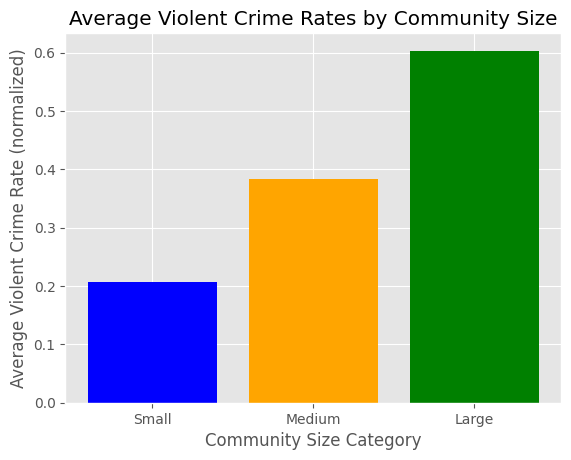

Creating plots for 1st Quartile...


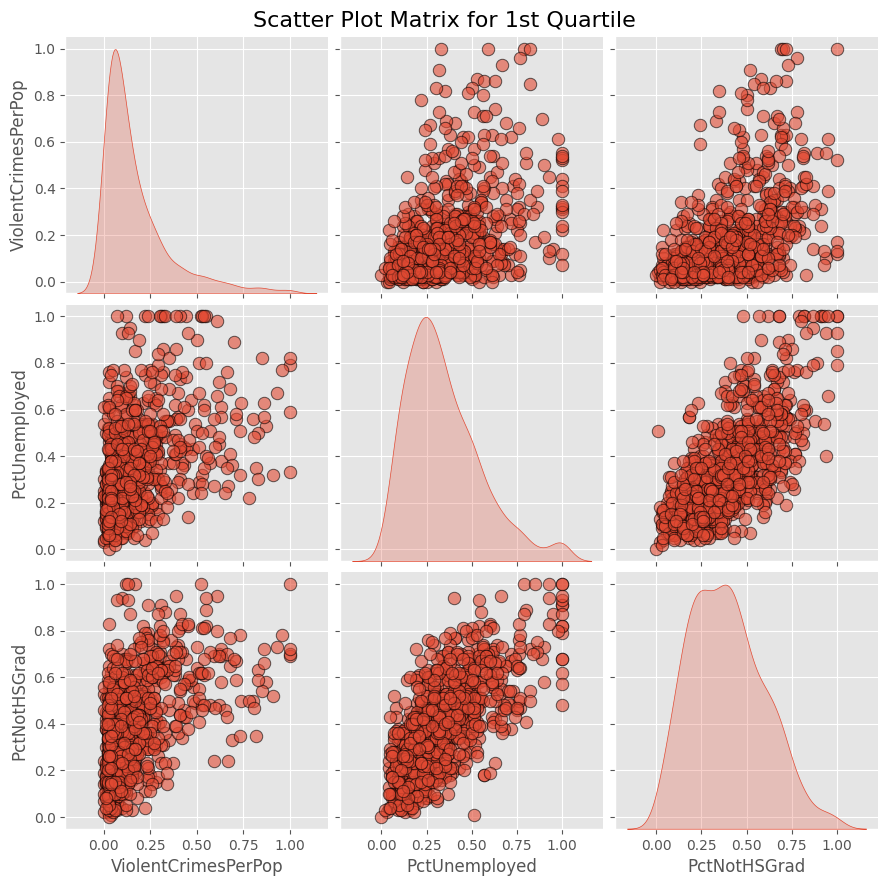

Creating plots for 2nd Quartile...


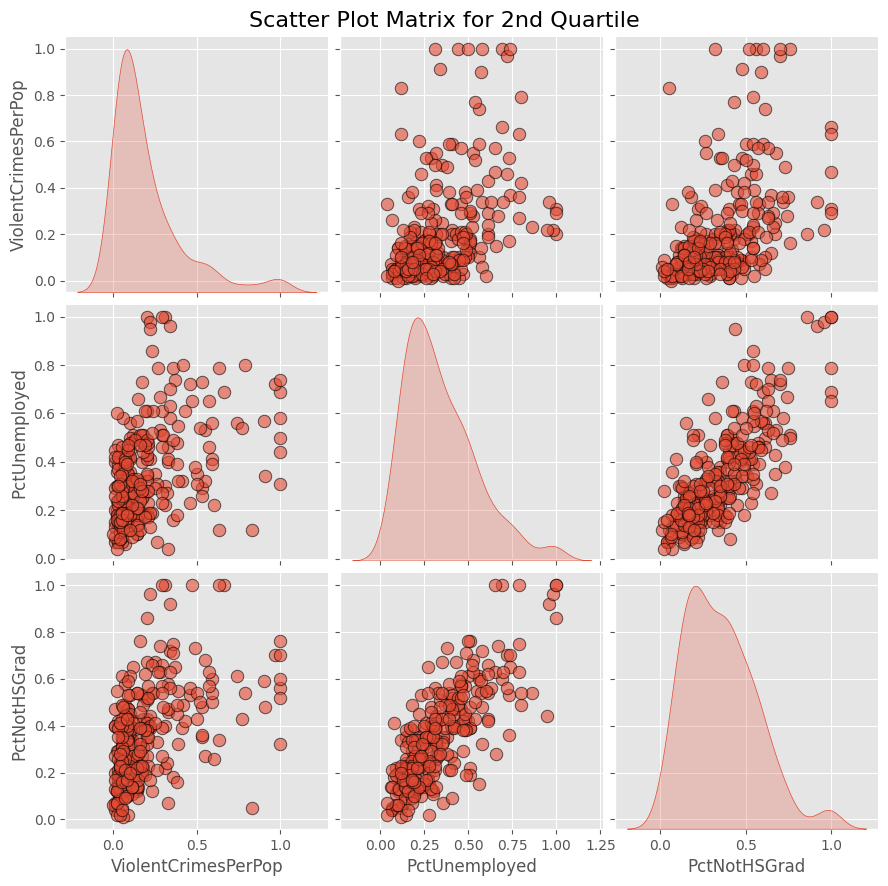

Creating plots for 3rd Quartile...


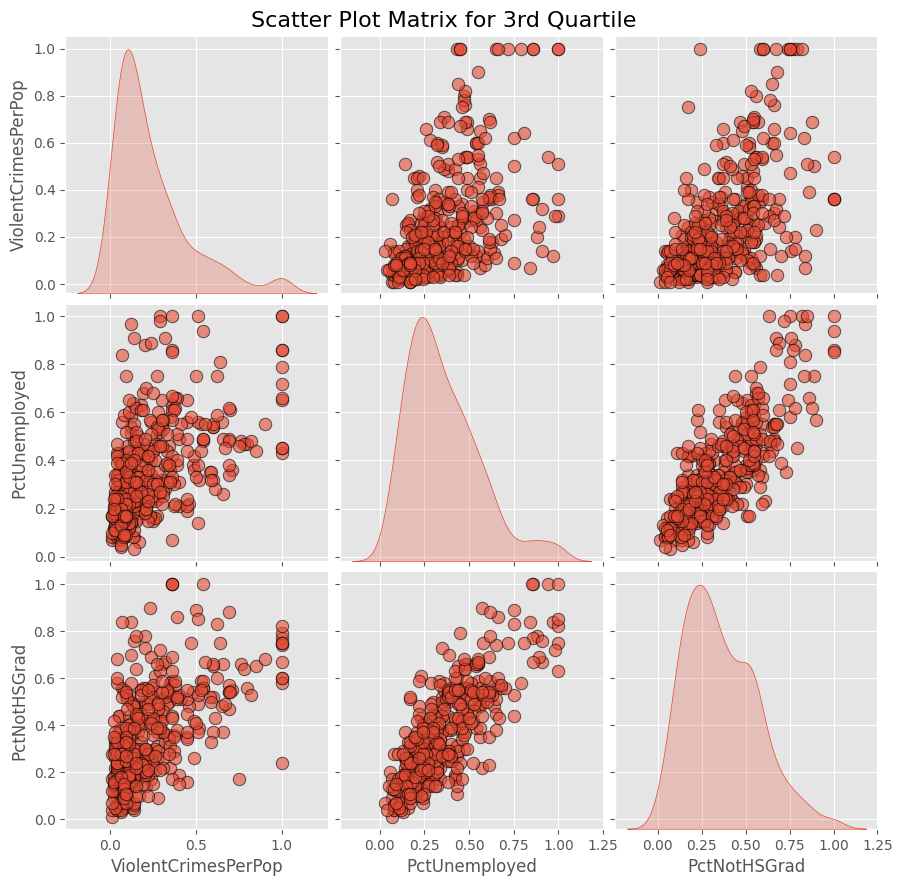

Creating plots for 4th Quartile...


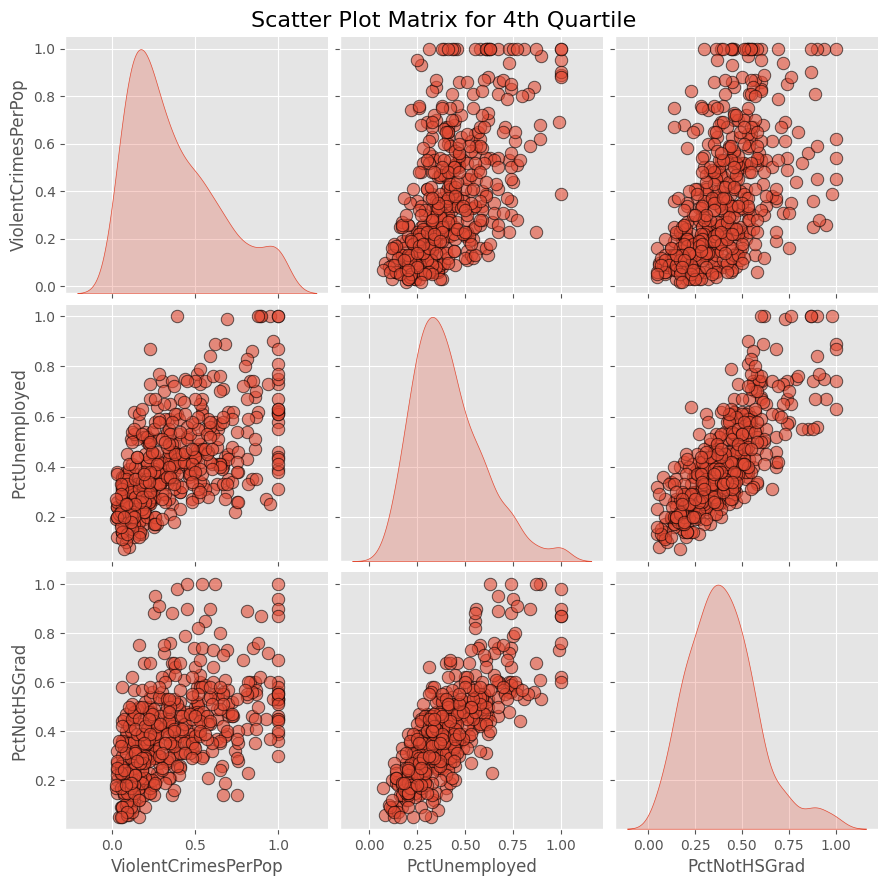

In [ ]:
#Question 8
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/CommunitiesDataset.csv'
communities_data = pd.read_csv(file_path)

# Categorizing the population into small, medium, and large categories
conditions = [
    (communities_data['population'] <= 0.1),
    (communities_data['population'] > 0.1) & (communities_data['population'] <= 0.3),
    (communities_data['population'] > 0.3)
]
choices = ['Small', 'Medium', 'Large']
communities_data['PopulationCategory'] = pd.cut(communities_data['population'], bins=[0, 0.1, 0.3, 1], labels=choices, right=False)

# Group by the new category and calculate the mean violent crime rate for each
crime_rates_by_size = communities_data.groupby('PopulationCategory')['ViolentCrimesPerPop'].mean()

# Create a bar plot of the average violent crime rates by community size category using Matplotlib
fig, ax = plt.subplots()
ax.bar(crime_rates_by_size.index, crime_rates_by_size.values, color=['blue', 'orange', 'green'])
ax.set_title('Average Violent Crime Rates by Community Size')
ax.set_xlabel('Community Size Category')
ax.set_ylabel('Average Violent Crime Rate (normalized)')

plt.show()




import seaborn as sns

def plot_community_size_crime_trends():
    # Load the data
    data = pd.read_csv('/content/CommunitiesDataset.csv')

    # Ensure the necessary columns exist and convert them to numeric if they're not
    required_columns = ['population', 'ViolentCrimesPerPop', 'PctUnemployed', 'PctNotHSGrad']
    if not all(col in data.columns for col in required_columns):
        print("Dataset is missing required columns.")
        return

    # Convert columns to float, handling non-numeric issues by coercing to NaN and then dropping
    for col in required_columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    data = data.dropna(subset=required_columns)

    # Calculate population size quantiles
    quantiles = data['population'].quantile([0.25, 0.5, 0.75])

    # Define population size categories
    data['Size_Category'] = pd.cut(data['population'],
                                   bins=[0, quantiles[0.25], quantiles[0.5], quantiles[0.75], data['population'].max()],
                                   include_lowest=True,
                                   labels=['1st Quartile', '2nd Quartile', '3rd Quartile', '4th Quartile'])

    # Iterate over each quantile category and plot a scatter plot matrix
    for category in data['Size_Category'].cat.categories:
        print(f"Creating plots for {category}...")
        subset = data[data['Size_Category'] == category]

        # Check if the subset is empty
        if subset.empty:
            print(f"No data available for {category}")
            continue

        # Use seaborn's pairplot for a scatter plot matrix of the variables
        g = sns.pairplot(subset, vars=['ViolentCrimesPerPop', 'PctUnemployed', 'PctNotHSGrad'],
                         diag_kind='kde',
                         plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
                         height=3)

        g.fig.suptitle(f'Scatter Plot Matrix for {category}', size=16)
        g.fig.subplots_adjust(top=0.95)  # Adjust the title to not overlap with plots
        plt.show()

plot_community_size_crime_trends()


**9.	What is the variance in police presence among communities, and how does it relate to crime rates?**

**•	With the use of Numpy Functions we will calculate the variance per capita and we will analyze its relationship with crime rates across the dataset.**

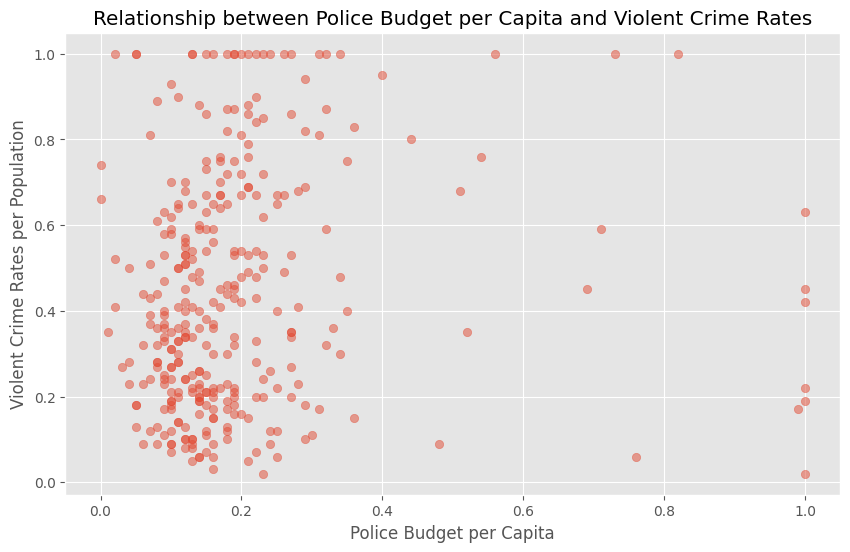

Variance in Police Budget per Capita: 0.03
Correlation between Police Budget per Capita and Violent Crime Rates: 0.10
Variance in Police Presence by Crime Rate Buckets:
Crime_Rate_Bucket
Very Low     0.039
Low          0.016
Medium       0.024
High         0.019
Very High    0.026
Name: PolicPerPop, dtype: float64


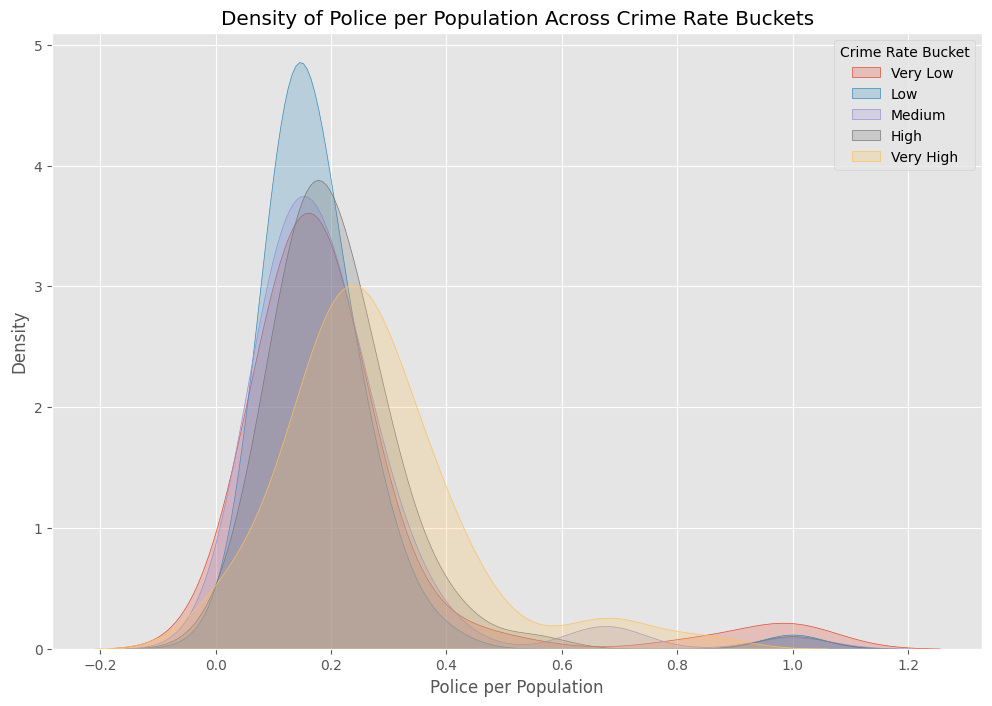

In [ ]:
#Question 9

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data_path = '/content/CommunitiesDataset.csv'
communities_data = pd.read_csv(data_path)

# Calculating the variance of Police Budget per Population
police_per_capita_variance = np.var(communities_data['PolicBudgPerPop'].dropna(), ddof=1)

# Calculating the correlation between Police Budget per Population and Violent Crimes per Population
correlation = communities_data[['PolicBudgPerPop', 'ViolentCrimesPerPop']].corr().iloc[0, 1]

# Scatter plot of Police Budget per Population against Violent Crimes per Population
plt.figure(figsize=(10, 6))
plt.scatter(communities_data['PolicBudgPerPop'], communities_data['ViolentCrimesPerPop'], alpha=0.5)
plt.title('Relationship between Police Budget per Capita and Violent Crime Rates')
plt.xlabel('Police Budget per Capita')
plt.ylabel('Violent Crime Rates per Population')
plt.grid(True)
plt.show()

# Print variance and correlation
print(f"Variance in Police Budget per Capita: {police_per_capita_variance:.2f}")
print(f"Correlation between Police Budget per Capita and Violent Crime Rates: {correlation:.2f}")


def analyze_police_presence_by_crime_density():
    # Load the dataset
    data = pd.read_csv('/content/CommunitiesDataset.csv')

    # Ensure necessary columns exist
    if 'PolicPerPop' not in data.columns or 'ViolentCrimesPerPop' not in data.columns:
        print("Dataset is missing required columns.")
        return

    # Dropping rows with missing data in the columns of interest
    data = data.dropna(subset=['PolicPerPop', 'ViolentCrimesPerPop'])

    # Create buckets for 'ViolentCrimesPerPop' based on quantiles
    data['Crime_Rate_Bucket'] = pd.qcut(data['ViolentCrimesPerPop'], 5, labels=["Very Low", "Low", "Medium", "High", "Very High"])

    # Calculate variance of 'PolicPerPop' within each bucket
    variances = data.groupby('Crime_Rate_Bucket')['PolicPerPop'].var()
    print("Variance in Police Presence by Crime Rate Buckets:")
    print(variances)

    # Plotting the density of 'PolicPerPop' across crime rate buckets
    plt.figure(figsize=(12, 8))
    for label in data['Crime_Rate_Bucket'].cat.categories:
        subset = data[data['Crime_Rate_Bucket'] == label]
        sns.kdeplot(subset['PolicPerPop'], label=label, fill=True)

    plt.title('Density of Police per Population Across Crime Rate Buckets')
    plt.xlabel('Police per Population')
    plt.ylabel('Density')
    plt.legend(title='Crime Rate Bucket')
    plt.grid(True)
    plt.show()

analyze_police_presence_by_crime_density()

**10.	How effective are community policing strategies across varying regions?**

**•	We will use Pandas functions to analyze the effectiveness of the policing strategies and to compare the results across regions in the data set.**


In [ ]:
#Question 10

import pandas as pd

# Set display options for floating point numbers
pd.set_option('display.precision', 3)

# Load the dataset
file_path = '/content/CommunitiesDataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Rename columns to more descriptive names
data.rename(columns={
    'PolicCars': 'PoliceCarsPerCapita',
    'PolicOperBudg': 'PoliceOperatingBudget',
    'PolicBudgPerPop': 'PoliceBudgetPerCapita',
    'LemasPctPolicOnPatr': 'PercentPoliceOnPatrol',
    'LemasGangUnitDeploy': 'GangUnitDeployment',
    'medIncome': 'MedianIncome',
    'ViolentCrimesPerPop': 'ViolentCrimeRate'
}, inplace=True)

# Select relevant columns for the analysis
selected_columns = [
    'PoliceCarsPerCapita', 'PoliceOperatingBudget', 'PoliceBudgetPerCapita',
    'PercentPoliceOnPatrol', 'GangUnitDeployment', 'MedianIncome', 'ViolentCrimeRate'
]

# Filter the dataset to include only the selected columns
selected_data = data[selected_columns].copy()

# Impute missing values with the median for numerical columns
for column in selected_data.columns:
    if pd.api.types.is_numeric_dtype(selected_data[column]):
        median_value = selected_data[column].median()
        selected_data.loc[:, column] = selected_data[column].fillna(median_value)

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Display the correlation matrix
print(correlation_matrix)



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_policing_strategies_with_all_numeric_predictors():
    # Load the dataset
    # Load the dataset
    file_path = '/content/CommunitiesDataset.csv'  # Replace with your file path
    data = pd.read_csv(file_path)

    # Define column names based on dataset description
    # This list should include all column names

    # Select only numeric columns, excluding any identifier or non-predictive columns
    numeric_predictors = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col])]

    # Define the variables of interest related to policing strategies
    variables_of_interest = [
    'LemasSwFTPerPop', 'LemasSwFTFieldPerPop','PolicPerPop',
    'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicMinor'
    ]

    # Ensure the variables of interest are at the beginning of the predictors list
    # Ensure the variables of interest are at the beginning of the predictors list

    other_predictors = ['population','PctUnemployed','medIncome', 'MedRent']
    predictors = variables_of_interest +  other_predictors


    # Define the target variable
    target = 'ViolentCrimesPerPop'  # Assuming the target column name is correctly specified

    # Drop rows with missing data in predictors and target
    data = data.dropna(subset=predictors + [target])

    # Print the number of observations before dropping missing values
    num_observations_before_dropna = len(data)
    print(f"Number of observations before dropping missing values: {num_observations_before_dropna}")


    # Split data into training and testing sets
    X = data[predictors]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Setting up and training the Lasso regression model
    lasso = LassoCV(cv=5, random_state=42)
    lasso.fit(X_train_scaled, y_train)

    # Making predictions on the test set
    y_pred = lasso.predict(X_test_scaled)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}")

    # Displaying coefficients for interpretation
    print("Coefficients for model variables:")
    for i, coef in enumerate(lasso.coef_):
        if coef != 0:
            print(f"{predictors[i]}: {coef:.4f}")

evaluate_policing_strategies_with_all_numeric_predictors()





                       PoliceCarsPerCapita  PoliceOperatingBudget  \
PoliceCarsPerCapita                  1.000                  0.821   
PoliceOperatingBudget                0.821                  1.000   
PoliceBudgetPerCapita                0.306                  0.312   
PercentPoliceOnPatrol               -0.178                 -0.147   
GangUnitDeployment                   0.029                 -0.017   
MedianIncome                        -0.104                 -0.063   
ViolentCrimeRate                     0.298                  0.265   

                       PoliceBudgetPerCapita  PercentPoliceOnPatrol  \
PoliceCarsPerCapita                    0.306                 -0.178   
PoliceOperatingBudget                  0.312                 -0.147   
PoliceBudgetPerCapita                  1.000                 -0.277   
PercentPoliceOnPatrol                 -0.277                  1.000   
GangUnitDeployment                    -0.053                  0.036   
MedianIncome         